In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Customer-Churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df.shape[1]

21

In [8]:
pd.DataFrame({"Missing Value (%) ":df.isnull().sum()/len(df.index)*100})

,Missing Value (%)
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


In [9]:
df[pd.to_numeric(df['TotalCharges'], errors = 'coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 21)

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])

<ipython-input-12-cffe5c08e1e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])


In [13]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

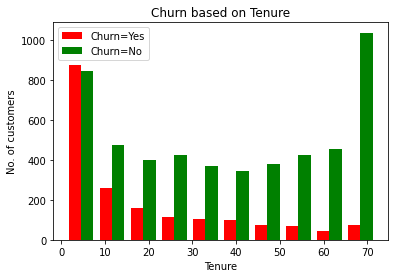

In [22]:
plt.xlabel('Tenure')
plt.ylabel('No. of customers')
plt.title('Churn based on Tenure')

plt.hist([df1[df1.Churn == 'Yes'].tenure, df1[df1.Churn == 'No'].tenure], color = ['red', 'green'],label = ['Churn=Yes', 'Churn=No'])
plt.legend();

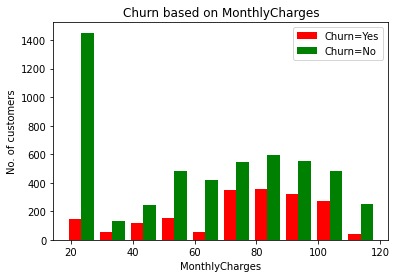

In [24]:
plt.xlabel('MonthlyCharges')
plt.ylabel('No. of customers')
plt.title('Churn based on MonthlyCharges')

plt.hist([df1[df1.Churn == 'Yes'].MonthlyCharges, df1[df1.Churn == 'No'].MonthlyCharges], color = ['red', 'green'],label = ['Churn=Yes', 'Churn=No'])
plt.legend();

In [26]:
df1.replace('No internet service', 'No', inplace =True)
df1.replace('No phone service', 'No', inplace =True)

In [29]:
see = []
for col in df1:
    if df1[col].dtype == object:
        see.append(col)

In [30]:
see

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [32]:
for col in see:
    df1[col].replace({'Yes':1}, inplace =True)
    df1[col].replace({'No':0}, inplace =True)

In [33]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [35]:
df1['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
0              1520
Name: InternetService, dtype: int64

In [36]:
df1['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [37]:
df1['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [38]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace =True)

C:\Users\juhia\anaconda3\envs\tf\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [43]:
df1 = pd.get_dummies(data=df1, columns = ['InternetService','Contract', 'PaymentMethod'])

In [44]:
del df1['customerID']

KeyError: 'customerID'

In [45]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [50]:
pd.DataFrame({"Unique Value Counts":df1.nunique()})

,Unique Value Counts
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,2
MultipleLines,2
OnlineSecurity,2
OnlineBackup,2
DeviceProtection,2


In [51]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [52]:
scale = ['tenure','MonthlyCharges', 'TotalCharges']

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1[scale] = scaler.fit_transform(df1[scale])

In [54]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [55]:
X = df1.drop('Churn', axis='columns')
y = df1['Churn']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=25)

In [58]:
X_train.shape

(5625, 26)

In [60]:
X_test.shape

(1407, 26)

In [77]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape= (26,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer = 'SGD',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 0.6297 - accuracy: 0.7301
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.7307
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.7307
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7307
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7307
Epoch 6/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.7307
Epoch 7/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.7307
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.7367
Epoch 9/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4479 - accuracy: 0.7792
Epoch 10/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4434 - accuracy: 0.7844

In [79]:
yp = model.predict(X_test)

In [83]:
y_predicted=[]

for i in yp:
    if i>0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0) 

In [84]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1053
           1       0.59      0.56      0.57       354

    accuracy                           0.79      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407



Text(69.0, 0.5, 'Truth')

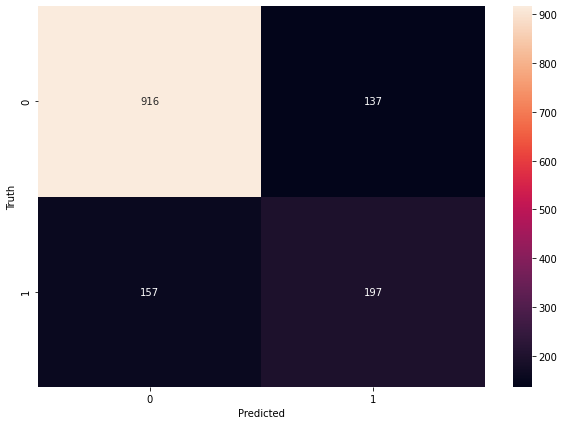

In [85]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')